In [1]:
# Question: Combining Multiple Outlier Detection Methods
# Description: Combine Z-score, IQR, and Boxplot methods to detect and compare outliers in adataset.




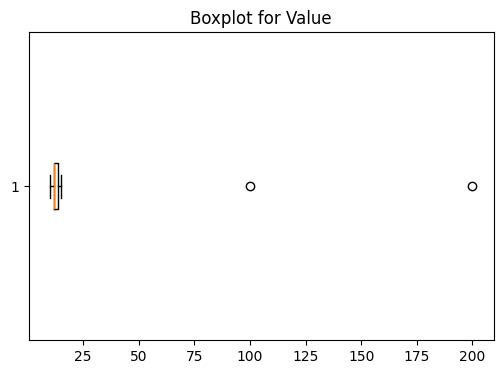

Detected Outliers:
    Value   Z_score  Zscore_Outlier  IQR_Outlier
0      10 -0.423424           False        False
1      12 -0.384806           False        False
2      12 -0.384806           False        False
3      13 -0.365496           False        False
4      12 -0.384806           False        False
5      11 -0.404115           False        False
6      14 -0.346187           False        False
7      15 -0.326878           False        False
8     100  1.314408           False         True
9      13 -0.365496           False        False
10     12 -0.384806           False        False
11     11 -0.404115           False        False
12    200  3.245332            True         True
13     12 -0.384806           False        False


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore

# Sample data
data = {
    'Value': [10, 12, 12, 13, 12, 11, 14, 15, 100, 13, 12, 11, 200, 12]
}
df = pd.DataFrame(data)

# 1. Z-score method
df['Z_score'] = zscore(df['Value'])
zscore_outliers = df[np.abs(df['Z_score']) > 3].index

# 2. IQR method
Q1 = df['Value'].quantile(0.25)
Q3 = df['Value'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
iqr_outliers = df[(df['Value'] < lower_bound) | (df['Value'] > upper_bound)].index

# Mark outliers in dataframe
df['Zscore_Outlier'] = df.index.isin(zscore_outliers)
df['IQR_Outlier'] = df.index.isin(iqr_outliers)

# 3. Visualize using boxplot (boxplot shows same IQR outliers)
plt.figure(figsize=(6,4))
plt.boxplot(df['Value'], vert=False)
plt.title('Boxplot for Value')
plt.show()

# Display results
print("Detected Outliers:")
print(df[['Value', 'Z_score', 'Zscore_Outlier', 'IQR_Outlier']])
